### <span style="color:#336699">Análise Exploratória dos Dados</span>
<hr>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import glob, os
from pandas.plotting import parallel_coordinates

In [33]:
data = pd.read_csv('../dataset2/dataset_completo.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14596 entries, 0 to 14595
Data columns (total 24 columns):
Halstead_b            14596 non-null float64
Halstead_d            14596 non-null float64
Halstead_e            14596 non-null float64
Halstead_i            14596 non-null float64
Halstead_l            14596 non-null float64
Halstead_lOBlank      14596 non-null int64
Halstead_lOCode       14596 non-null int64
Halstead_lOComment    14596 non-null int64
Halstead_n            14596 non-null float64
Halstead_t            14596 non-null float64
Halstead_v            14596 non-null float64
Language              14596 non-null int64
McCabe_ev(g)          14596 non-null float64
McCabe_iv(g)          14596 non-null float64
McCabe_loc            14596 non-null float64
McCabe_v(g)           14596 non-null float64
SOFTWARE              14596 non-null int64
branchCount           14596 non-null float64
defects               14596 non-null int64
locCodeAndComment     14596 non-null int64
total

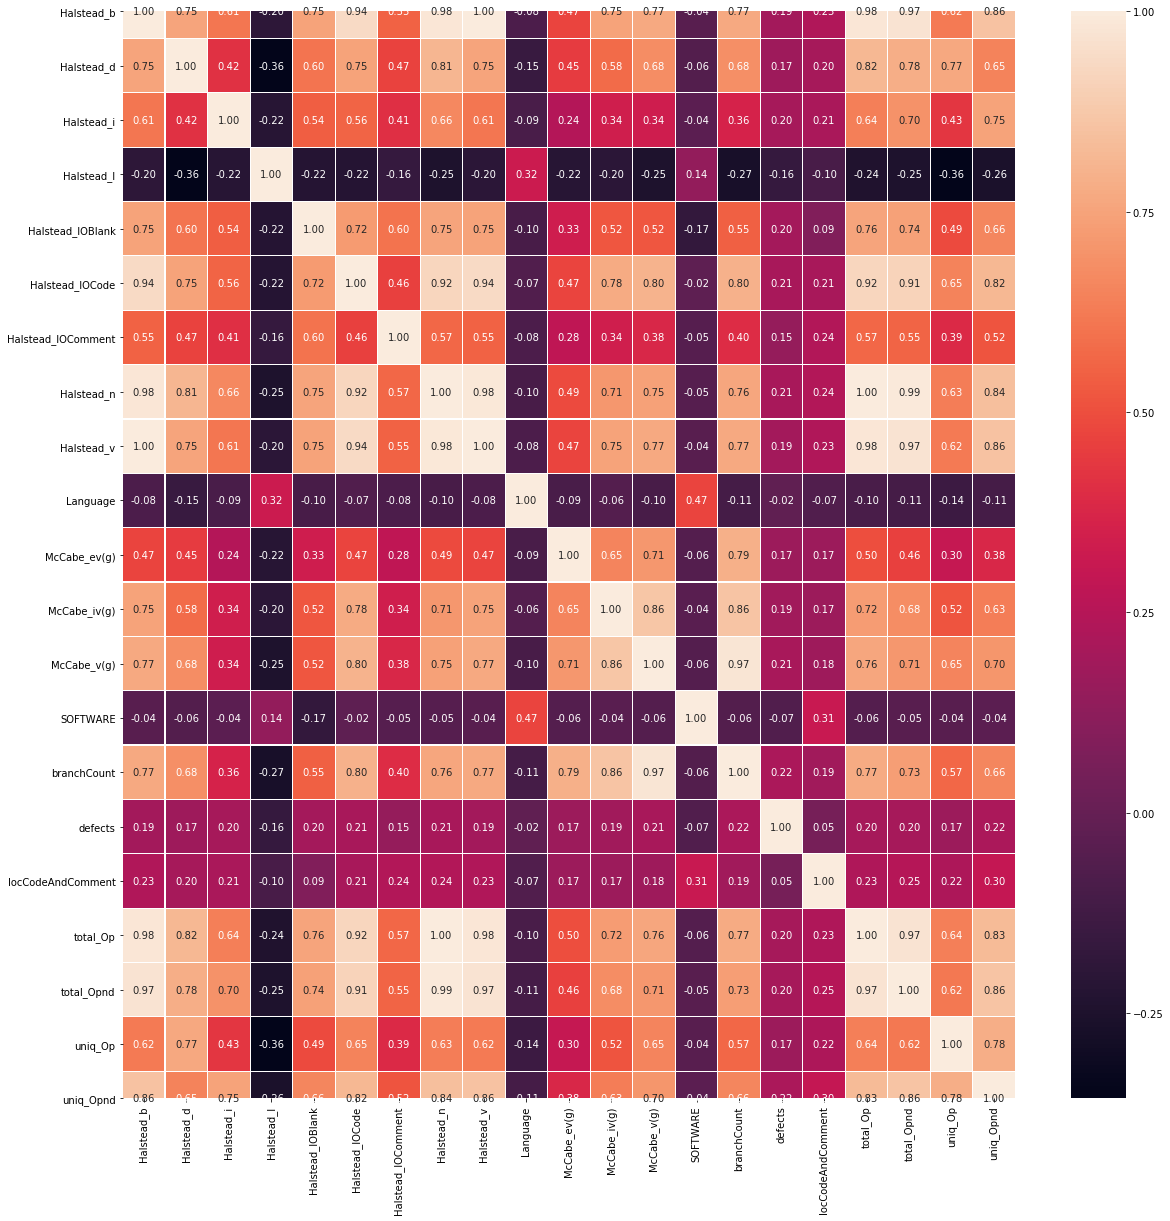

In [29]:
f,ax = plt.subplots(figsize = (20, 20))
sns.heatmap(data.corr(), annot = True, linewidths = .2, fmt = '.2f')
plt.show()

In [5]:
data.head()

,Halstead_b,Halstead_d,Halstead_e,Halstead_i,Halstead_l,Halstead_lOBlank,Halstead_lOCode,Halstead_lOComment,Halstead_n,Halstead_t,...,McCabe_loc,McCabe_v(g),SOFTWARE,branchCount,defects,locCodeAndComment,total_Op,total_Opnd,uniq_Op,uniq_Opnd
0,1.30,1.30,1.30,1.30,1.30,2,2,2,1.3,1.30,...,1.1,1.4,0,1.4,0,2,1.2,1.2,1.2,1.2
1,1.00,1.00,1.00,1.00,1.00,1,1,1,1.0,1.00,...,1.0,1.0,0,1.0,1,1,1.0,1.0,1.0,1.0
2,0.10,9.50,2936.77,32.54,0.11,6,1,0,63.0,163.15,...,24.0,5.0,0,9.0,0,0,44.0,19.0,15.0,15.0
3,0.07,16.00,3447.89,13.47,0.06,3,0,0,47.0,191.55,...,20.0,4.0,0,7.0,0,0,31.0,16.0,16.0,8.0
4,0.12,17.33,5999.58,19.97,0.06,3,0,0,72.0,333.31,...,24.0,6.0,0,11.0,0,0,46.0,26.0,16.0,12.0


In [6]:
data.columns

Index(['Halstead_b', 'Halstead_d', 'Halstead_e', 'Halstead_i', 'Halstead_l',
       'Halstead_lOBlank', 'Halstead_lOCode', 'Halstead_lOComment',
       'Halstead_n', 'Halstead_t', 'Halstead_v', 'Language', 'McCabe_ev(g)',
       'McCabe_iv(g)', 'McCabe_loc', 'McCabe_v(g)', 'SOFTWARE', 'branchCount',
       'defects', 'locCodeAndComment', 'total_Op', 'total_Opnd', 'uniq_Op',
       'uniq_Opnd'],
      dtype='object')

In [ ]:
g = sns.pairplot(data, hue='defects')

In [ ]:
data.info()

Como a variancia entre as variáveis é muito grande optou-se por normalizar os dados para faciltar a visualização.
<br>

Para isso utilzou-se a função de normalização a seguir, retirada de https://www.it-swarm.net/pt/python/normalize-colunas-do-dataframe-do-pandas/1049023341/

In [20]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [24]:
aux = data[["McCabe_loc","McCabe_v(g)","McCabe_ev(g)","McCabe_iv(g)","Halstead_n",
            "Halstead_v","Halstead_l","Halstead_d","Halstead_i","Halstead_e","Halstead_b",
            "Halstead_t","Halstead_lOCode","Halstead_lOComment","Halstead_lOBlank",
            "locCodeAndComment","uniq_Op","uniq_Opnd","total_Op","total_Opnd","branchCount","defects"]]

In [ ]:
aux = normalize(aux)

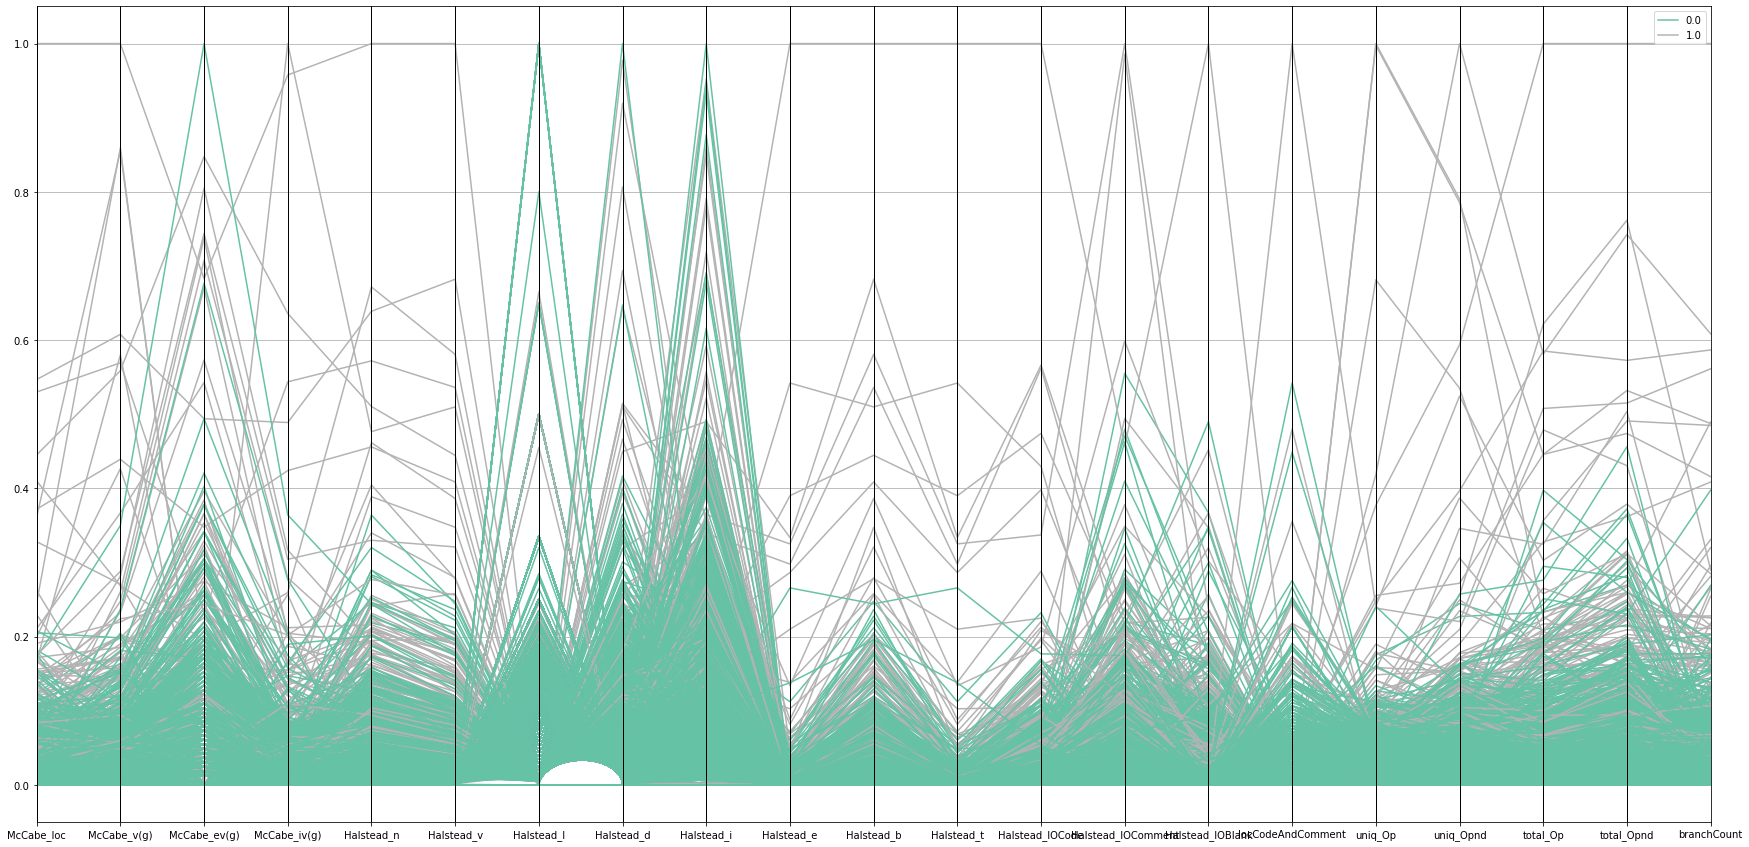

In [26]:
f,ax = plt.subplots(figsize = (30, 15))
parallel_coordinates(aux,'defects', colormap=plt.get_cmap("Set2"))
plt.show()

In [27]:
newData = data
del newData['McCabe_loc']
del newData['Halstead_e']
del newData["Halstead_t"]

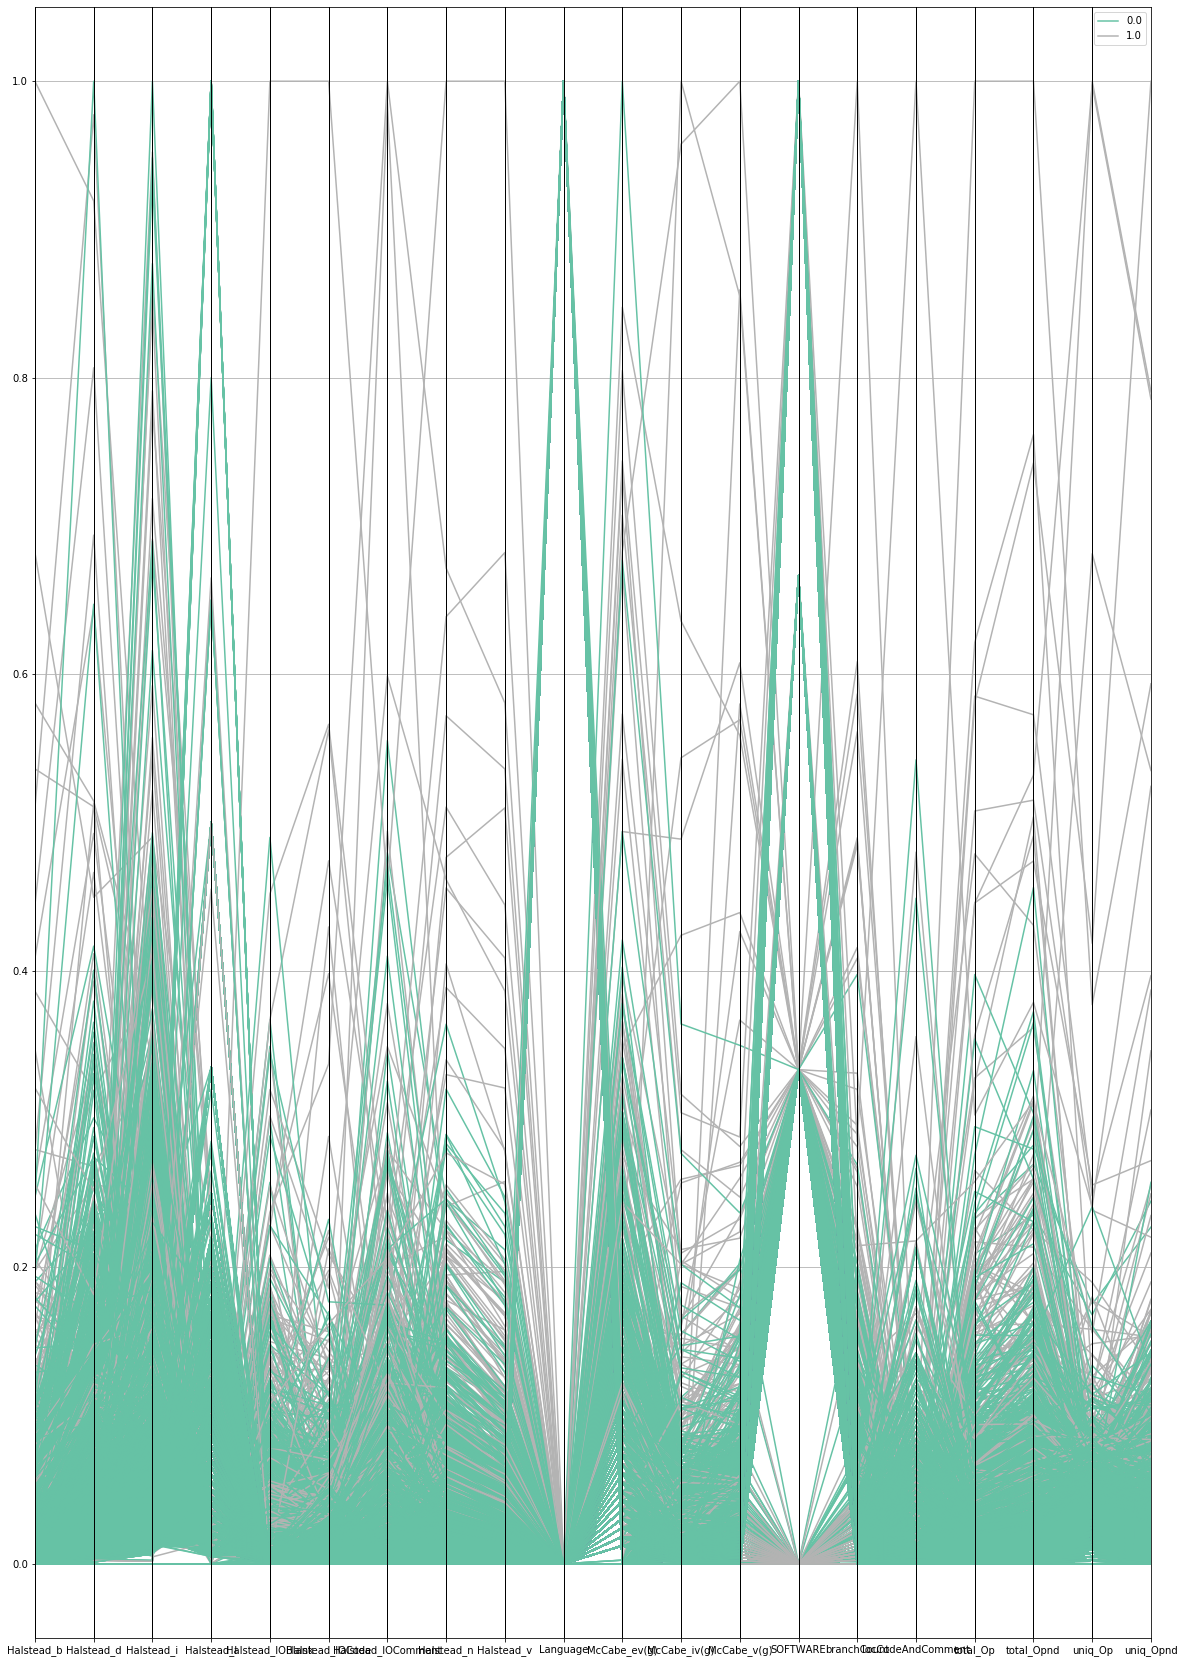

In [28]:
f,ax = plt.subplots(figsize = (20, 30))
parallel_coordinates(newData, 'defects', colormap=plt.get_cmap("Set2"))
plt.show()

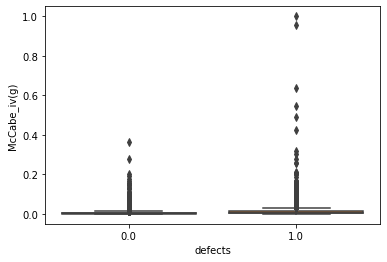

In [30]:
sns.boxplot(x='defects', y='McCabe_iv(g)', data=data)

Text(0.0, 1.0, 'Violin plot')

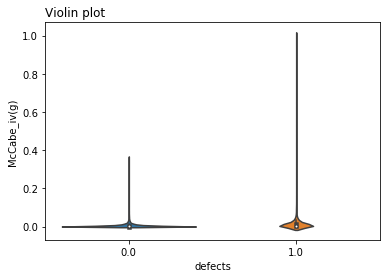

In [31]:
sns.violinplot( x='defects', y='McCabe_iv(g)', data=data)
plt.title("Violin plot", loc="left")

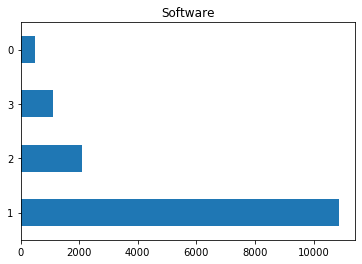

In [34]:
data['SOFTWARE'].value_counts().plot.barh(title="Software")

A relação de observações que apresentaram ou não falha.

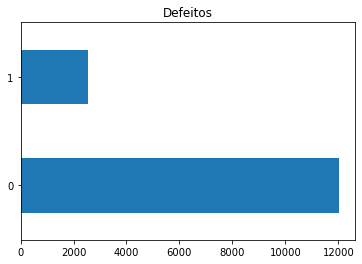

In [35]:
data['defects'].value_counts().plot.barh(title="Defeitos")

Matriz de correlação dos dados.

## Árvore de decisão

In [36]:
from sklearn import tree

In [37]:
classes = data['defects']

In [38]:
del data['defects']

In [39]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, classes)

In [40]:
nan_rows = data[data.isnull().any(1)]
nan_rows

,Halstead_b,Halstead_d,Halstead_e,Halstead_i,Halstead_l,Halstead_lOBlank,Halstead_lOCode,Halstead_lOComment,Halstead_n,Halstead_t,...,McCabe_iv(g),McCabe_loc,McCabe_v(g),SOFTWARE,branchCount,locCodeAndComment,total_Op,total_Opnd,uniq_Op,uniq_Opnd


[Text(207.76725646953554, 214.722, 'X[14] <= 40.5\nentropy = 0.289\nsamples = 14596\nvalue = [12041, 2555]'),
 Text(116.3403141541101, 209.286, 'X[5] <= 1.5\nentropy = 0.201\nsamples = 10885\nvalue = [9652, 1233]'),
 Text(70.85690151754879, 203.85, 'X[14] <= 19.5\nentropy = 0.139\nsamples = 6560\nvalue = [6067, 493]'),
 Text(47.60210747916898, 198.414, 'X[0] <= 0.805\nentropy = 0.117\nsamples = 5518\nvalue = [5174, 344]'),
 Text(34.83014990624699, 192.978, 'X[14] <= 5.5\nentropy = 0.115\nsamples = 5512\nvalue = [5173, 339]'),
 Text(9.913153562793092, 187.542, 'X[2] <= 37.045\nentropy = 0.069\nsamples = 2334\nvalue = [2251, 83]'),
 Text(3.474175029911676, 182.106, 'X[6] <= 0.5\nentropy = 0.035\nsamples = 1231\nvalue = [1209, 22]'),
 Text(1.0448646706501281, 176.67000000000002, 'X[1] <= 1.75\nentropy = 0.007\nsamples = 536\nvalue = [534, 2]'),
 Text(0.41794586826005126, 171.23399999999998, 'X[4] <= 0.835\nentropy = 0.004\nsamples = 513\nvalue = [512, 1]'),
 Text(0.20897293413002563, 165.

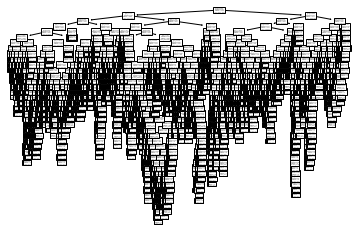

In [41]:
tree.plot_tree(clf.fit(data, classes))

In [42]:
import graphviz
import os

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("Software Defective")

In [ ]:
data.columns

In [ ]:
graph =dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=np.array(data.columns),  
                      class_names=np.array(['OK', 'Defeito']),  
                      filled=True, rounded=True,  
                      special_characters=True)  
dot_data
graph = graphviz.Source(dot_data)  
graph.render("arvore")

In [ ]:
graph

<div style='text-align:left;width:40%;float:left;'>
    <a href="./../Manipulação_dos_dados.ipynb">Anterior</a>
</div>
<div style='text-align:right;width:30%; float:right'>
    <a href="./3.1_Análise_Exploratória_dos_Dados_Halstead.ipynb">Próximo</a>
</div>